In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

from tensorflow.keras.datasets import mnist

In [3]:

class SigmoidNeuron:
    def __init__(self):
 
        self.w = None
        self.b = None

    def perceptron(self, x):
        
        return np.dot(x, self.w) + self.b

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        else:  # y == 1
            return - (1 - y_pred) * x

    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred
        else:  # y == 1
            return - (1 - y_pred)

    def fit(self, X, Y, epochs=10, lr=0.1, loss_fn="mse"):
        
        self.w = np.random.randn(X.shape[1])
        self.b = 0

        
        loss_history = []                            # loss

        for epoch in range(epochs):
            total_dw = 0
            total_db = 0
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                if loss_fn == "mse":
                    total_dw += self.grad_w_mse(x, y)
                    total_db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    total_dw += self.grad_w_ce(x, y)
                    total_db += self.grad_b_ce(x, y)

            
            total_dw /= len(X)
            total_db /= len(X)

            
            self.w -= lr * total_dw
            self.b -= lr * total_db

            Y_pred = self.predict(X)
            if loss_fn == "mse":
                loss = np.mean((Y - Y_pred) ** 2)
            elif loss_fn == "ce":
          
                Y_pred = np.clip(Y_pred, 1e-10, 1-1e-10)
                loss = -np.mean(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))

            loss_history.append(loss)
            print(f"Epoch data inga varum {epoch+1}, Loss evlo {loss:.4f}")

        
        plt.plot(loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

    def predict(self, X):
     
        return np.array([self.sigmoid(self.perceptron(x)) for x in X])


In [5]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
np.random.seed(0)

In [6]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


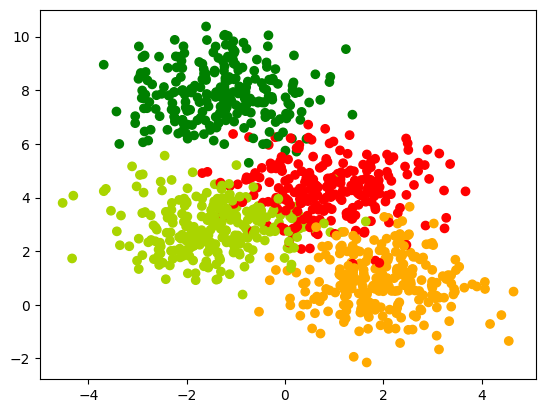

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)


(750, 2) (250, 2)


In [11]:
class FirstFFNetwork:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_pass(self, x):
        x1, x2 = x
        a1 = self.w1*x1 + self.w2*x2 + self.b1
        h1 = self.sigmoid(a1)
        a2 = self.w3*x1 + self.w4*x2 + self.b2
        h2 = self.sigmoid(a2)
        a3 = self.w5*h1 + self.w6*h2 + self.b3
        h3 = self.sigmoid(a3)
        return h1, h2, h3

    def grad(self, x, y):
        x1, x2 = x
        h1, h2, h3 = self.forward_pass(x)
        d_output = (h3 - y) * h3 * (1 - h3)
        dw5 = d_output * h1
        dw6 = d_output * h2
        db3 = d_output
        d_h1 = d_output * self.w5 * h1 * (1 - h1)
        dw1 = d_h1 * x1
        dw2 = d_h1 * x2
        db1 = d_h1
        d_h2 = d_output * self.w6 * h2 * (1 - h2)
        dw3 = d_h2 * x1
        dw4 = d_h2 * x2
        db2 = d_h2
        return dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3

    def fit(self, X, Y, epochs=10, lr=0.1, display_loss=False):
        loss_history = []

        for epoch in range(epochs):
            dw1 = dw2 = dw3 = dw4 = dw5 = dw6 = db1 = db2 = db3 = 0
            for x, y in zip(X, Y):
                g = self.grad(x, y)
                dw1 += g[0]; dw2 += g[1]; dw3 += g[2]; dw4 += g[3]
                dw5 += g[4]; dw6 += g[5]; db1 += g[6]; db2 += g[7]; db3 += g[8]

            m = len(X)
            self.w1 -= lr * dw1 / m
            self.w2 -= lr * dw2 / m
            self.w3 -= lr * dw3 / m
            self.w4 -= lr * dw4 / m
            self.w5 -= lr * dw5 / m
            self.w6 -= lr * dw6 / m
            self.b1 -= lr * db1 / m
            self.b2 -= lr * db2 / m
            self.b3 -= lr * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss = np.mean((Y - Y_pred) ** 2)
                loss_history.append(loss)
                print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

        if display_loss:
            plt.plot(loss_history)
            plt.xlabel("Epochs")
            plt.ylabel("MSE Loss")
            plt.show()

    def predict(self, X):
        return np.array([self.forward_pass(x)[2] for x in X])

In [12]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

Epoch 1, Loss: 0.2754
Epoch 2, Loss: 0.2737
Epoch 3, Loss: 0.2721
Epoch 4, Loss: 0.2707
Epoch 5, Loss: 0.2694
Epoch 6, Loss: 0.2682
Epoch 7, Loss: 0.2671
Epoch 8, Loss: 0.2662
Epoch 9, Loss: 0.2653
Epoch 10, Loss: 0.2645
Epoch 11, Loss: 0.2638
Epoch 12, Loss: 0.2631
Epoch 13, Loss: 0.2626
Epoch 14, Loss: 0.2620
Epoch 15, Loss: 0.2615
Epoch 16, Loss: 0.2611
Epoch 17, Loss: 0.2607
Epoch 18, Loss: 0.2603
Epoch 19, Loss: 0.2599
Epoch 20, Loss: 0.2596
Epoch 21, Loss: 0.2593
Epoch 22, Loss: 0.2590
Epoch 23, Loss: 0.2588
Epoch 24, Loss: 0.2585
Epoch 25, Loss: 0.2583
Epoch 26, Loss: 0.2581
Epoch 27, Loss: 0.2579
Epoch 28, Loss: 0.2577
Epoch 29, Loss: 0.2575
Epoch 30, Loss: 0.2573
Epoch 31, Loss: 0.2572
Epoch 32, Loss: 0.2570
Epoch 33, Loss: 0.2569
Epoch 34, Loss: 0.2567
Epoch 35, Loss: 0.2566
Epoch 36, Loss: 0.2564
Epoch 37, Loss: 0.2563
Epoch 38, Loss: 0.2561
Epoch 39, Loss: 0.2560
Epoch 40, Loss: 0.2558
Epoch 41, Loss: 0.2557
Epoch 42, Loss: 0.2556
Epoch 43, Loss: 0.2555
Epoch 44, Loss: 0.25

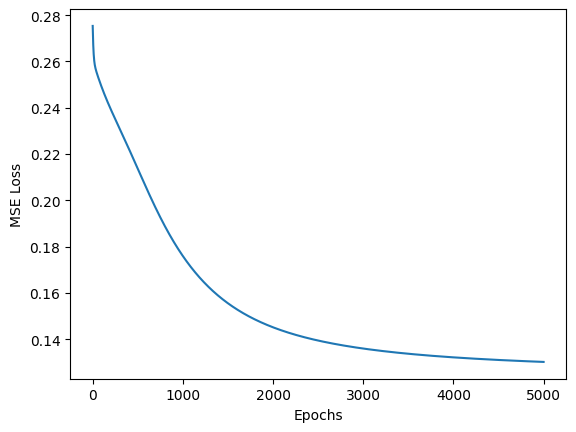

In [13]:
network = FirstFFNetwork()
network.fit(X, Y, epochs=5000, lr=0.5, display_loss=True)

In [14]:
predictions = network.predict(X)
print("Predictions:", predictions)

Predictions: [0.05799127 0.49973508 0.92116149 0.5108201 ]


Epoch 1, Loss: 0.2592
Epoch 2, Loss: 0.2592
Epoch 3, Loss: 0.2592
Epoch 4, Loss: 0.2591
Epoch 5, Loss: 0.2591
Epoch 6, Loss: 0.2591
Epoch 7, Loss: 0.2591
Epoch 8, Loss: 0.2591
Epoch 9, Loss: 0.2591
Epoch 10, Loss: 0.2591
Epoch 11, Loss: 0.2591
Epoch 12, Loss: 0.2591
Epoch 13, Loss: 0.2591
Epoch 14, Loss: 0.2591
Epoch 15, Loss: 0.2591
Epoch 16, Loss: 0.2591
Epoch 17, Loss: 0.2591
Epoch 18, Loss: 0.2591
Epoch 19, Loss: 0.2591
Epoch 20, Loss: 0.2591
Epoch 21, Loss: 0.2591
Epoch 22, Loss: 0.2591
Epoch 23, Loss: 0.2591
Epoch 24, Loss: 0.2591
Epoch 25, Loss: 0.2591
Epoch 26, Loss: 0.2591
Epoch 27, Loss: 0.2591
Epoch 28, Loss: 0.2591
Epoch 29, Loss: 0.2591
Epoch 30, Loss: 0.2591
Epoch 31, Loss: 0.2591
Epoch 32, Loss: 0.2591
Epoch 33, Loss: 0.2591
Epoch 34, Loss: 0.2591
Epoch 35, Loss: 0.2591
Epoch 36, Loss: 0.2591
Epoch 37, Loss: 0.2591
Epoch 38, Loss: 0.2591
Epoch 39, Loss: 0.2591
Epoch 40, Loss: 0.2590
Epoch 41, Loss: 0.2590
Epoch 42, Loss: 0.2590
Epoch 43, Loss: 0.2590
Epoch 44, Loss: 0.25

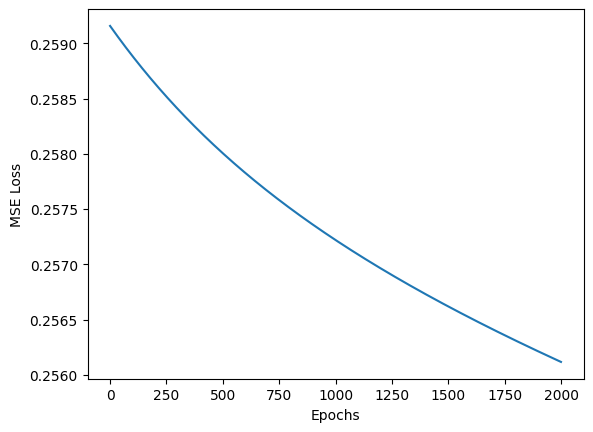

In [17]:
ffn = FirstFFNetwork()
ffn.fit(X, Y, epochs=2000, lr=0.01, display_loss=True)

In [18]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training points", round(accuracy_train, 2))
print("Validation points", round(accuracy_val, 2))

Training points 0.46
Validation points 0.48


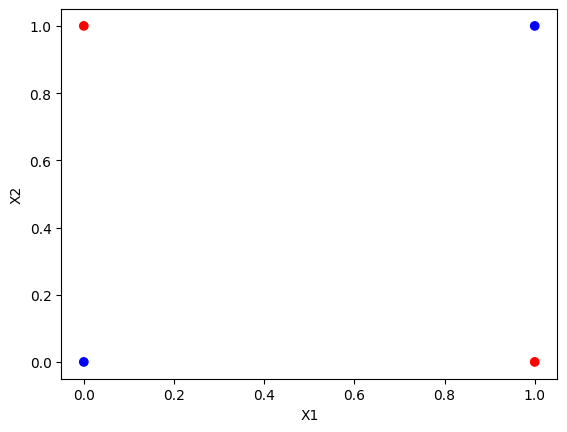

In [19]:

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])


plt.scatter(X[:,0], X[:,1], c=Y, cmap='bwr')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


Epoch 1, Loss: 0.3668
Epoch 2, Loss: 0.3630
Epoch 3, Loss: 0.3592
Epoch 4, Loss: 0.3553
Epoch 5, Loss: 0.3514
Epoch 6, Loss: 0.3475
Epoch 7, Loss: 0.3435
Epoch 8, Loss: 0.3395
Epoch 9, Loss: 0.3355
Epoch 10, Loss: 0.3315
Epoch 11, Loss: 0.3276
Epoch 12, Loss: 0.3236
Epoch 13, Loss: 0.3198
Epoch 14, Loss: 0.3160
Epoch 15, Loss: 0.3122
Epoch 16, Loss: 0.3086
Epoch 17, Loss: 0.3051
Epoch 18, Loss: 0.3016
Epoch 19, Loss: 0.2983
Epoch 20, Loss: 0.2952
Epoch 21, Loss: 0.2921
Epoch 22, Loss: 0.2893
Epoch 23, Loss: 0.2865
Epoch 24, Loss: 0.2839
Epoch 25, Loss: 0.2814
Epoch 26, Loss: 0.2791
Epoch 27, Loss: 0.2769
Epoch 28, Loss: 0.2749
Epoch 29, Loss: 0.2730
Epoch 30, Loss: 0.2712
Epoch 31, Loss: 0.2696
Epoch 32, Loss: 0.2681
Epoch 33, Loss: 0.2666
Epoch 34, Loss: 0.2653
Epoch 35, Loss: 0.2641
Epoch 36, Loss: 0.2630
Epoch 37, Loss: 0.2619
Epoch 38, Loss: 0.2610
Epoch 39, Loss: 0.2601
Epoch 40, Loss: 0.2593
Epoch 41, Loss: 0.2585
Epoch 42, Loss: 0.2578
Epoch 43, Loss: 0.2572
Epoch 44, Loss: 0.25

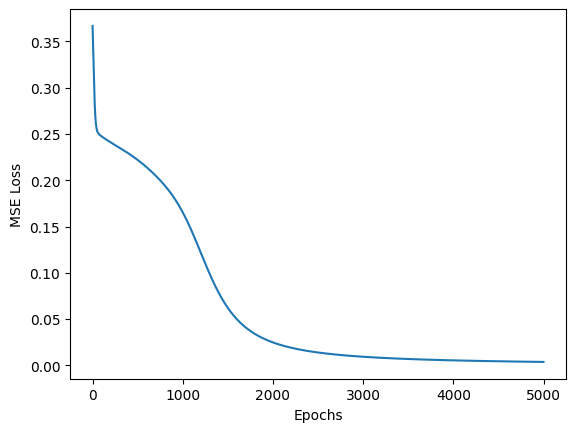

FF Network predictions: [0.06773809 0.94015147 0.94306286 0.05985606]


In [21]:
ffn = FirstFFNetwork()
ffn.fit(X, Y, epochs=5000, lr=0.5, display_loss=True)
preds_ffn = ffn.predict(X)
print("FF Network predictions:", preds_ffn)


In [22]:
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28)
(60000,)


In [23]:

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)


In [26]:

input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01

# Weights
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [27]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


In [30]:
#hidden
Z1 = np.dot(X_train, W1) + b1
A1 = relu(Z1)

#output
Z2 = np.dot(A1, W2) + b2
A2 = softmax(Z2)

print(A2)
print(A1)
print("a2",A2[0])

[[0.09995492 0.09851436 0.1001441  ... 0.0988029  0.10152299 0.10066057]
 [0.0993224  0.09978349 0.10018854 ... 0.09879691 0.10209727 0.10046446]
 [0.10004378 0.10058392 0.09908366 ... 0.10010114 0.10151072 0.09964471]
 ...
 [0.10031174 0.09992636 0.09973934 ... 0.09937635 0.10129557 0.10000131]
 [0.09991919 0.09962366 0.09964239 ... 0.09950376 0.10120145 0.10011947]
 [0.0991733  0.09998996 0.10025887 ... 0.10014427 0.10102921 0.09924774]]
[[0.06767284 0.08392738 0.02134247 ... 0.00854883 0.00633827 0.03713091]
 [0.15942597 0.24010015 0.0311845  ... 0.         0.01869663 0.        ]
 [0.07121031 0.12415324 0.         ... 0.13457499 0.         0.        ]
 ...
 [0.00368758 0.04722174 0.07092776 ... 0.         0.         0.19311497]
 [0.01348686 0.13375071 0.         ... 0.01691369 0.         0.02791408]
 [0.12383793 0.15945834 0.         ... 0.04178596 0.12634237 0.08283628]]
a2 [0.09995492 0.09851436 0.1001441  0.09996468 0.09943619 0.1006656
 0.10033369 0.0988029  0.10152299 0.1006605

In [31]:
def cross_entropy(y_true, y_pred):
    n_samples = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / n_samples


In [ ]:

dZ2 = A2 - y_train            
dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]


dA1 = np.dot(dZ2, W2.T)
dZ1 = dA1 * relu_derivative(Z1)
dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]


W1 -= learning_rate * dW1
b1 -= learning_rate * db1
W2 -= learning_rate * dW2
b2 -= learning_rate * db2

print(db2)


[[ 0.00117165 -0.01236037  0.00011072 -0.00246641  0.00245901  0.0099916
   0.00145516 -0.00494799  0.00342437  0.00116226]]


In [ ]:
np.argmax(A2[0])  


np.int64(8)

# custom data training


In [38]:

train_data = pd.read_csv("D:/git/data/fashion-mnist_train.csv")
test_data = pd.read_csv("D:/git/data/fashion-mnist_test.csv")

X_train = train_data.drop("label", axis=1).values / 255.0
y_train = to_categorical(train_data["label"].values, 10)

X_test = test_data.drop("label", axis=1).values / 255.0
y_test = to_categorical(test_data["label"].values, 10)


In [49]:
input_size = 784      # 28x28 pixels
hidden_size = 128
output_size = 10      # 10 classes
learning_rate = 0.1
epochs = 200


In [40]:
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [41]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    n_samples = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / n_samples


In [50]:
for epoch in range(epochs):
    
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)


    loss = cross_entropy(y_train, A2)

   
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

   
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


Epoch 1/200, Loss: 0.8610
Epoch 2/200, Loss: 0.8578
Epoch 3/200, Loss: 0.8547
Epoch 4/200, Loss: 0.8516
Epoch 5/200, Loss: 0.8486
Epoch 6/200, Loss: 0.8457
Epoch 7/200, Loss: 0.8428
Epoch 8/200, Loss: 0.8400
Epoch 9/200, Loss: 0.8372
Epoch 10/200, Loss: 0.8344
Epoch 11/200, Loss: 0.8318
Epoch 12/200, Loss: 0.8291
Epoch 13/200, Loss: 0.8265
Epoch 14/200, Loss: 0.8240
Epoch 15/200, Loss: 0.8215
Epoch 16/200, Loss: 0.8190
Epoch 17/200, Loss: 0.8166
Epoch 18/200, Loss: 0.8143
Epoch 19/200, Loss: 0.8119
Epoch 20/200, Loss: 0.8096
Epoch 21/200, Loss: 0.8074
Epoch 22/200, Loss: 0.8051
Epoch 23/200, Loss: 0.8029
Epoch 24/200, Loss: 0.8008
Epoch 25/200, Loss: 0.7986
Epoch 26/200, Loss: 0.7965
Epoch 27/200, Loss: 0.7945
Epoch 28/200, Loss: 0.7924
Epoch 29/200, Loss: 0.7905
Epoch 30/200, Loss: 0.7885
Epoch 31/200, Loss: 0.7867
Epoch 32/200, Loss: 0.7850
Epoch 33/200, Loss: 0.7837
Epoch 34/200, Loss: 0.7831
Epoch 35/200, Loss: 0.7841
Epoch 36/200, Loss: 0.7876
Epoch 37/200, Loss: 0.7973
Epoch 38/2

In [51]:
# Forward pass on test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = softmax(Z2_test)

# Predicted labels
y_pred = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 77.72%


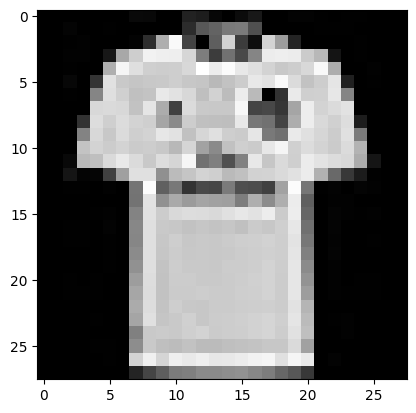

Predicted: 0 Actual: 0


In [52]:

i = 0
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.show()
print("Predicted:", y_pred[i], "Actual:", y_true[i])
